# Ames Modeling

Load the dataset, begin modeling.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from itertools import combinations

housing = pd.read_csv('data/housing_final.csv')

In [28]:
#housing.count()
#housing.info()
#housing.describe()

# Simple Linear Regression (SLR)

In [29]:
#Set up the model
lm = LinearRegression()

#remove categorical non numeric features
housing_num = housing.select_dtypes(exclude=[object])
features = list(housing_num.columns.values)

results = []
# Loop through each feature and examine the score
for i, feature in enumerate(housing[features]):
    if housing[feature].dtype=='object':
        print(feature," is non-numeric, skipping...")
    else:
        lm.fit(housing[[features[i]]], housing['SalePrice'])
        score=lm.score(housing[[features[i]]], housing['SalePrice'])
        results.append([score,feature])

results.sort(reverse=True)
print("R2 for Simple Linear Regression models: score, feature", results[:10])


R2 for Simple Linear Regression models: score, feature [[1.0, 'SalePrice'], [0.6703369733121959, 'TotalSF'], [0.6220204113917098, 'OverallQual'], [0.5188062352643753, 'GrLivArea'], [0.4648441528315935, 'ExterQual'], [0.4271723555387249, 'KitchenQual'], [0.42252823034957065, 'TotalBsmtSF'], [0.4108968356381133, '1stFlrSF'], [0.4059227064499761, 'GarageCars'], [0.4043527251340946, 'GarageArea']]


# Feature Selection

In [30]:
numerical_features=['GrLivArea','SalePrice','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea',
 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
 'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
 'ScreenPorch','PoolArea','MiscVal','DistanceToISU','YearsSinceRemod','TotalSF','DateSold']
cat_ord_features=['LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual',
 'BsmtCond','HeatingQC','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
 'KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageCars',
 'GarageQual','GarageCond','PoolQC','DistanceCategory']
cat_nom_features=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities',
 'LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
 'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageType','GarageFinish',
 'PavedDrive','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']

In [4]:
#remove categorical non numeric features
housing_num = housing.select_dtypes(exclude=[object])
features = list(housing_num.columns.values)
#features.remove('PID')
#features.remove('SalePrice')
#features.remove('PricePerSF')

features = ['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
            'LowQualFinSF', 'BedroomAbvGr']
X = housing[features]  # Features
y = housing['SalePrice']  # Target variable


# LazyPredict Results

In [5]:
from lazypredict.Supervised import LazyRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

reg = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)


  5%|██▌                                                   | 2/42 [00:00<00:04,  8.39it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.840176719964536, 'Adjusted R-Squared': 0.8353040589878451, 'RMSE': 33300.179974576655, 'Time taken': 0.13353538513183594}
{'Model': 'BaggingRegressor', 'R-Squared': 0.8790156249058609, 'Adjusted R-Squared': 0.8753270768846981, 'RMSE': 28972.849056028055, 'Time taken': 0.10862421989440918}
{'Model': 'BayesianRidge', 'R-Squared': 0.8711066359185786, 'Adjusted R-Squared': 0.867176960184389, 'RMSE': 29904.86460050161, 'Time taken': 0.011617898941040039}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7813859526675484, 'Adjusted R-Squared': 0.774720890248876, 'RMSE': 38946.24516081087, 'Time taken': 0.02348494529724121}
{'Model': 'DummyRegressor', 'R-Squared': -0.011261209566445496, 'Adjusted R-Squared': -0.04209234400444695, 'RMSE': 83764.15955074431, 'Time taken': 0.004528045654296875}
{'Model': 'ElasticNet', 'R-Squared': 0.8348934375320087, 'Adjusted R-Squared': 0.8298597008713993, 'RMSE': 33846.10744072745, 'Time taken': 0.0092995166778564

 17%|█████████                                             | 7/42 [00:00<00:01, 24.77it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.07619794775699962, 'Adjusted R-Squared': 0.04803325104227396, 'RMSE': 80060.08048314229, 'Time taken': 0.05809664726257324}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.7572159496243138, 'Adjusted R-Squared': 0.7498139968689576, 'RMSE': 41042.76748419642, 'Time taken': 0.013013124465942383}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8985214374702439, 'Adjusted R-Squared': 0.8954275788565319, 'RMSE': 26534.671434955497, 'Time taken': 0.44308972358703613}


 24%|████████████▌                                        | 10/42 [00:01<00:04,  7.90it/s]

{'Model': 'GammaRegressor', 'R-Squared': 0.8003182669830922, 'Adjusted R-Squared': 0.7942304092691621, 'RMSE': 37221.659302119006, 'Time taken': 0.29686975479125977}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.5011516810415224, 'Adjusted R-Squared': -0.5469185005854713, 'RMSE': 102056.07213130726, 'Time taken': 0.2308948040008545}


 29%|███████████████▏                                     | 12/42 [00:01<00:05,  5.84it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9197116484859442, 'Adjusted R-Squared': 0.9172638328910034, 'RMSE': 23602.218769285384, 'Time taken': 0.3351771831512451}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9093581786181475, 'Adjusted R-Squared': 0.9065947084540666, 'RMSE': 25077.88305959222, 'Time taken': 0.16068673133850098}


 38%|████████████████████▏                                | 16/42 [00:02<00:03,  8.01it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.8533509566896719, 'Adjusted R-Squared': 0.8488799492716741, 'RMSE': 31898.200099285423, 'Time taken': 0.05841493606567383}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8583431033613556, 'Adjusted R-Squared': 0.8540242955370067, 'RMSE': 31350.568647100095, 'Time taken': 0.025905609130859375}
{'Model': 'KernelRidge', 'R-Squared': -3.658917314126568, 'Adjusted R-Squared': -3.8009574761426217, 'RMSE': 179791.4613396096, 'Time taken': 0.08225512504577637}
{'Model': 'Lars', 'R-Squared': 0.871157459329425, 'Adjusted R-Squared': 0.8672293330894685, 'RMSE': 29898.96818727887, 'Time taken': 0.010660648345947266}
{'Model': 'LarsCV', 'R-Squared': 0.871157459329425, 'Adjusted R-Squared': 0.8672293330894685, 'RMSE': 29898.96818727887, 'Time taken': 0.01869034767150879}
{'Model': 'Lasso', 'R-Squared': 0.871156744863527, 'Adjusted R-Squared': 0.8672285968410736, 'RMSE': 29899.051085999392, 'Time taken': 0.006959438323974609}
{'Model': 'LassoCV', 'R-Squared

 50%|██████████████████████████▌                          | 21/42 [00:02<00:01, 13.91it/s]

{'Model': 'LassoLars', 'R-Squared': 0.8711564403324127, 'Adjusted R-Squared': 0.8672282830254741, 'RMSE': 29899.0864203518, 'Time taken': 0.01212620735168457}
{'Model': 'LassoLarsCV', 'R-Squared': 0.871157459329425, 'Adjusted R-Squared': 0.8672293330894685, 'RMSE': 29898.96818727887, 'Time taken': 0.026903152465820312}
{'Model': 'LassoLarsIC', 'R-Squared': 0.871157459329425, 'Adjusted R-Squared': 0.8672293330894685, 'RMSE': 29898.96818727887, 'Time taken': 0.009228944778442383}
{'Model': 'LinearRegression', 'R-Squared': 0.8712156589200768, 'Adjusted R-Squared': 0.867289307057884, 'RMSE': 29892.21457837303, 'Time taken': 0.007174491882324219}
{'Model': 'LinearSVR', 'R-Squared': -4.839595184981423, 'Adjusted R-Squared': -5.01763162354793, 'RMSE': 201288.0218659635, 'Time taken': 0.006882667541503906}


 67%|███████████████████████████████████▎                 | 28/42 [00:03<00:01,  9.77it/s]

{'Model': 'MLPRegressor', 'R-Squared': -4.739773003924023, 'Adjusted R-Squared': -4.914766083311951, 'RMSE': 199560.19500739736, 'Time taken': 0.7798864841461182}
{'Model': 'NuSVR', 'R-Squared': -0.044102233764996335, 'Adjusted R-Squared': -0.07593461894075837, 'RMSE': 85113.42625346911, 'Time taken': 0.11951017379760742}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.613240905591911, 'Adjusted R-Squared': 0.6014494697867864, 'RMSE': 51802.03587791513, 'Time taken': 0.006064653396606445}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8270623303291698, 'Adjusted R-Squared': 0.821789840400181, 'RMSE': 34639.47987478352, 'Time taken': 0.014287710189819336}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8458193684658855, 'Adjusted R-Squared': 0.841118739455699, 'RMSE': 32707.057249444555, 'Time taken': 0.03545355796813965}


 74%|███████████████████████████████████████              | 31/42 [00:03<00:01,  6.51it/s]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8926901662498085, 'Adjusted R-Squared': 0.8894185249769367, 'RMSE': 27286.40507172331, 'Time taken': 0.778918981552124}
QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.
{'Model': 'RANSACRegressor', 'R-Squared': 0.8158208988010047, 'Adjusted R-Squared': 0.8102056823010353, 'RMSE': 35747.58731692905, 'Time taken': 0.06908440589904785}


 90%|███████████████████████████████████████████████▉     | 38/42 [00:05<00:00,  6.57it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8952866153306547, 'Adjusted R-Squared': 0.8920941340907356, 'RMSE': 26954.2753026478, 'Time taken': 0.959331750869751}
{'Model': 'Ridge', 'R-Squared': 0.871145577719244, 'Adjusted R-Squared': 0.8672170892350746, 'RMSE': 29900.346768038286, 'Time taken': 0.010561466217041016}
{'Model': 'RidgeCV', 'R-Squared': 0.8711455777185366, 'Adjusted R-Squared': 0.8672170892343456, 'RMSE': 29900.346768120355, 'Time taken': 0.011186361312866211}
{'Model': 'SGDRegressor', 'R-Squared': 0.8674864013091077, 'Adjusted R-Squared': 0.8634463525685317, 'RMSE': 30321.926115260787, 'Time taken': 0.008447885513305664}
{'Model': 'SVR', 'R-Squared': -0.10598838176681902, 'Adjusted R-Squared': -0.1397075397475147, 'RMSE': 87599.5435873258, 'Time taken': 0.16621732711791992}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8712156589200768, 'Adjusted R-Squared': 0.867289307057884, 'RMSE': 29892.21457837303, 'Time taken': 0.013428926467895508}


100%|█████████████████████████████████████████████████████| 42/42 [00:05<00:00,  7.08it/s]

{'Model': 'TweedieRegressor', 'R-Squared': 0.7937842846792788, 'Adjusted R-Squared': 0.7874972201877933, 'RMSE': 37825.74064877541, 'Time taken': 0.6315264701843262}
{'Model': 'XGBRegressor', 'R-Squared': 0.8984975306145924, 'Adjusted R-Squared': 0.8954029431333299, 'RMSE': 26537.79683990232, 'Time taken': 0.08541393280029297}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1914
[LightGBM] [Info] Number of data points in the train set: 2030, number of used features: 15
[LightGBM] [Info] Start training from score 176435.230542
{'Model': 'LGBMRegressor', 'R-Squared': 0.9080885071060449, 'Adjusted R-Squared': 0.9052863274446439, 'RMSE': 25252.912338499205, 'Time taken': 0.07158327102661133}
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoos

# Multiple Linear Regression (MLR)

In [6]:

def get_results(X, y):
    # Split the dataset into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test) # Make predictions on the test set
    r2_value_calculated = r2_score(y_test, y_pred)
    return [r2_value_calculated, X.columns.values]

# Get all combinations
#n = len(features)
#results = []
#for i in range(1,n+1,1):
    #print(i, "features")
    #comb = combinations(features, i)
    #print(sum(1 for _ in comb))
#    for c in comb:
        #time.sleep(.01)
#        X = housing[list(c)]  # Features
#        y = housing['SalePrice']  # Target variable
#        r = get_results(X, y)
#        if r[0] > 0.8: 
#            results.append(r)
#            print(r)

#results.sort(reverse=True)
#print("R2 for Multiple Linear Regression models: score, features", results[:20])
#results.sort(reverse=True)
#for i in range(len(results)):
#    print(results[i],sep="\n")
    #calculate tolerance (the R2 between features)
    #handle categorical data
      
r = get_results(X, y)

print(features)
print("R2 for Multiple Linear Regression model: ", r[0])

#This was used for Simple Linear Regression, but r2_score for multiple. 
#What is the difference? Which to use?
# Calculate the R-squared score
#r2_score = lm.score(X_test, y_test)
#print("R-squared:", r2_score)
# Calculate the R-squared score
#r2_value_calculated = r2_score(y_test, y_pred)
#print("R-squared:", r2_value_calculated)

['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BedroomAbvGr']
R2 for Multiple Linear Regression model:  0.8711574593294273


# MLR with K-fold Cross Validation

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

print("MLR with k-fold Cross Validation")
print("Features:\n", features)

# Create an instance of KFold with the desired number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store RMSE and R-squared values for each fold
rmse_scores = []
r2_scores = []

# Iterate over the folds
i=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 2. Modeling (MLR)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test) # Make predictions on the test set
    
    # 3. Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Append the scores to the respective lists
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    print(i,"R-squared:", r2)
    i=i+1

# Calculate the average RMSE and R-squared across all folds
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

print("Average RMSE:", avg_rmse)
print("Average R-squared:", avg_r2)


MLR with k-fold Cross Validation
Features:
 ['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BedroomAbvGr']
0 R-squared: 0.8711574593294258
1 R-squared: 0.8705324642231851
2 R-squared: 0.8638143350948937
3 R-squared: 0.8835724754915262
4 R-squared: 0.8758713624200646
Average RMSE: 26896.16478586815
Average R-squared: 0.872989619311819


# Ridge, Lasso, and Elastic Net

In [10]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

print("Ridge, Lasso, and Elastic Net with GridSearchCV for alpha")
print("Features:\n", features)

# Initialize lists to store RMSE and R-squared values for each fold
#rmse_scores = []
#r2_scores = []

# Create an instance of KFold with the desired number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #################### Use GridSearch to find the best alphas ############################
    # Define a range of alpha values to search
    params = {'alpha': np.logspace(-6, 6, 13)}
    # Create a grid search for Ridge, Lasso, and ElasticNet with cross-validation
    ridge_grid = GridSearchCV(Ridge(), params, cv=kf, scoring='neg_mean_squared_error', return_train_score=True)
    lasso_grid = GridSearchCV(Lasso(), params, cv=kf, scoring='neg_mean_squared_error', return_train_score=True)
    elasticnet_grid = GridSearchCV(ElasticNet(), params, cv=kf, scoring='neg_mean_squared_error', return_train_score=True)

    # Fit the grid search on the training data
    ridge_grid.fit(X_train, y_train)
    lasso_grid.fit(X_train, y_train)
    elasticnet_grid.fit(X_train, y_train)

    # Get the best alpha value from grid search
    best_ridge_alpha = ridge_grid.best_params_['alpha']
    best_lasso_alpha = lasso_grid.best_params_['alpha']
    best_enet_alpha = elasticnet_grid.best_params_['alpha']

    print("Best alpha for Ridge:", best_ridge_alpha)
    print("Best alpha for Lasso:", best_lasso_alpha)
    print("Best alpha for ElasticNet:", best_enet_alpha)

    ############################ Create Models ###########################################
    # Initialize models
    l1_ratio = 0.5  # Mixing parameter for ElasticNet, controls the balance between Ridge and Lasso
    ridge_model = Ridge(alpha=best_ridge_alpha) 
    lasso_model = Lasso(alpha=best_lasso_alpha)
    elasticnet_model = ElasticNet(alpha=best_enet_alpha, l1_ratio=l1_ratio)

    # Fit the models on the training data
    ridge_model.fit(X_train, y_train)
    lasso_model.fit(X_train, y_train)
    elasticnet_model.fit(X_train, y_train)

    # Make predictions using models
    ridge_predictions = ridge_model.predict(X_test)
    lasso_predictions = lasso_model.predict(X_test)
    elasticnet_predictions = elasticnet_model.predict(X_test)

    ############################ Evaluate Models #########################################
    # Calculate RMSE for the models
    #ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
    #lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
    #elasticnet_rmse = np.sqrt(mean_squared_error(y_test, elasticnet_predictions))

    #print(f"RMSE (Ridge): {ridge_rmse:.4f}")
    #print(f"RMSE (Lasso): {lasso_rmse:.4f}")
    #print(f"RMSE (ElasticNet): {elasticnet_rmse:.4f}")

    # Calculate R-squared for the models
    ridge_r2 = r2_score(y_test, ridge_predictions)
    lasso_r2 = r2_score(y_test, lasso_predictions)
    elasticnet_r2 = r2_score(y_test, elasticnet_predictions)

    print("R-squared for Ridge model:", ridge_r2)
    print("R-squared for Lasso model:", lasso_r2)
    print("R-squared for ElasticNet model:", elasticnet_r2)

    # Append the scores to the respective lists
    #rmse_scores.append(rmse)
    #r2_scores.append(r2)

 

# Calculate the average RMSE and R-squared across all folds
#avg_rmse = np.mean(rmse_scores)
#avg_r2 = np.mean(r2_scores)

#print("Average RMSE (ElasticNet):", avg_rmse)
#print("Average R-squared (ElasticNet):", avg_r2)


Ridge, Lasso, and Elastic Net with GridSearchCV for alpha
Features:
 ['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BedroomAbvGr']
Best alpha for Ridge: 1e-06
Best alpha for Lasso: 1e-06
Best alpha for ElasticNet: 1e-06
R-squared for Ridge model: 0.8711574593324417
R-squared for Lasso model: 0.8711574593299067
R-squared for ElasticNet model: 0.8711574623917118
Best alpha for Ridge: 10.0
Best alpha for Lasso: 10.0
Best alpha for ElasticNet: 0.01
R-squared for Ridge model: 0.8704972500412783
R-squared for Lasso model: 0.8705254281374943
R-squared for ElasticNet model: 0.8704966870020576
Best alpha for Ridge: 1.0
Best alpha for Lasso: 1e-06
Best alpha for ElasticNet: 0.001
R-squared for Ridge model: 0.8638200903364058
R-squared for Lasso model: 0.8638143350958488
R-squared for ElasticNet model: 0.8638201765057321
Best alpha for Ridge: 10.

# GridSearch CV

In [45]:

# 2. Set Up Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lasso hyperparameters (alpha values, you can adjust this list for finer search if needed)
params = {'alpha': np.logspace(-6, 6, 13)}

grid_search = GridSearchCV(Lasso(), params, cv=kf, scoring='neg_mean_squared_error', return_train_score=True)

# 3. Training and Hyperparameter Optimization
grid_search.fit(X, y)

# Print the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Initialize a list to store R-squared values for each fold
r2_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    print(f"Fold R^2: {r2:.4f}")


Best Alpha: 1e-06
Fold R^2: 0.8784
Fold R^2: 0.8190
Fold R^2: 0.8860
Fold R^2: 0.8688
Fold R^2: 0.8415


In [46]:


grid_search = GridSearchCV(ElasticNet(), params, cv=kf, scoring='neg_mean_squared_error', return_train_score=True)

# 3. Training and Hyperparameter Optimization
grid_search.fit(X, y)

# Print the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Initialize a list to store R-squared values for each fold
r2_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    print(f"Fold R^2: {r2:.4f}")


Best Alpha: 1e-06
Fold R^2: 0.8784
Fold R^2: 0.8190
Fold R^2: 0.8860
Fold R^2: 0.8688
Fold R^2: 0.8415


In [47]:

# Loop over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create a Linear Regression model
    model = LinearRegression()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate R-squared for this fold
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    print(f"Fold R^2: {r2:.4f}")
    
average_r2 = np.mean(r2_scores)
print(f"Average R^2: {average_r2:.4f}")



Fold R^2: 0.8784
Fold R^2: 0.8190
Fold R^2: 0.8860
Fold R^2: 0.8688
Fold R^2: 0.8415
Average R^2: 0.8587


In [48]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your dataset and define X (features) and y (target variable)
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'YearBuilt', 
            'FullBath', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces']
X = housing[features]
y = housing['SalePrice']

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation results for each fold
mae_scores = []
mse_scores = []
rmse_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create a Linear Regression model
    model = LinearRegression()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate MAE, MSE, and RMSE for this fold
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Append the scores to the respective lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Calculate the mean and standard deviation of the scores across folds
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

std_mae = np.std(mae_scores)
std_mse = np.std(mse_scores)
std_rmse = np.std(rmse_scores)

# Print the results
print(f"Mean Absolute Error (MAE): {mean_mae:.4f} +/- {std_mae:.4f}")
print(f"Mean Squared Error (MSE): {mean_mse:.4f} +/- {std_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {mean_rmse:.4f} +/- {std_rmse:.4f}")


Mean Absolute Error (MAE): 21348.9824 +/- 538.7870
Mean Squared Error (MSE): 950357983.6669 +/- 115521005.9409
Root Mean Squared Error (RMSE): 30770.5824 +/- 1878.6274


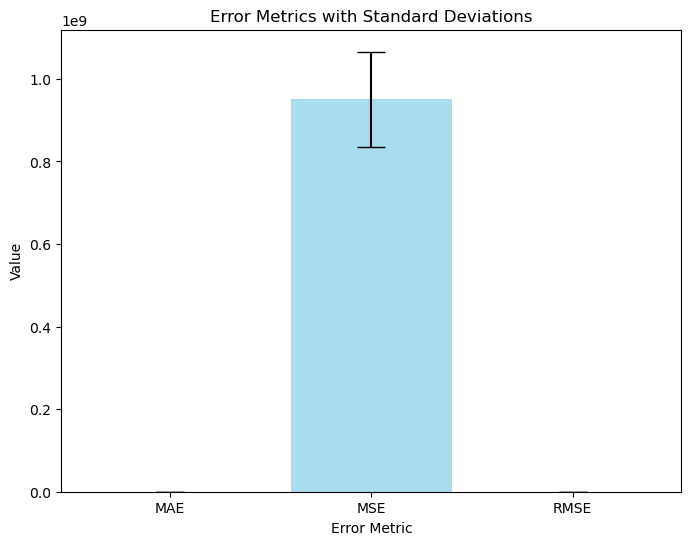

In [49]:
import matplotlib.pyplot as plt

# Mean error values
error_metrics = ['MAE', 'MSE', 'RMSE']
mean_errors = [21348.9824, 950357983.6669, 30770.5824]

# Standard deviations
std_dev = [538.7870, 115521005.9409, 1878.6274]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(error_metrics, mean_errors, yerr=std_dev, capsize=10, color='skyblue', alpha=0.7)
plt.xlabel('Error Metric')
plt.ylabel('Value')
plt.title('Error Metrics with Standard Deviations')
plt.show()

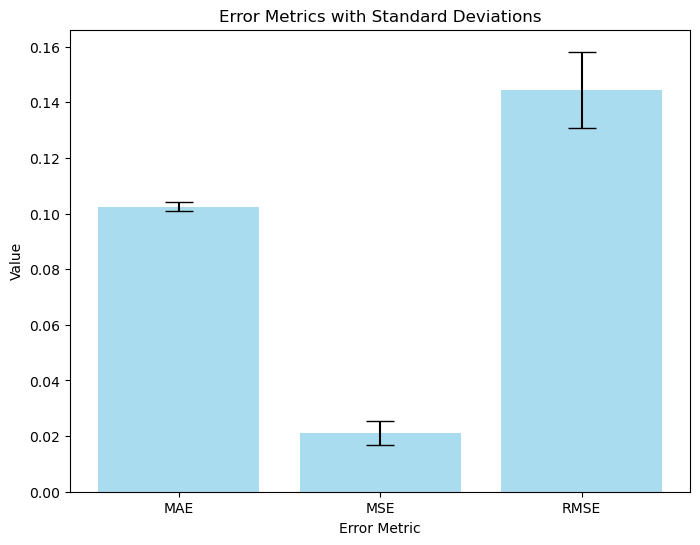

In [50]:
import matplotlib.pyplot as plt

# Mean error values
error_metrics = ['MAE', 'MSE', 'RMSE']
mean_errors = [0.1025, 0.0211, 0.1445]

# Standard deviations
std_dev = [0.0015, 0.0042, 0.0137]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(error_metrics, mean_errors, yerr=std_dev, capsize=10, color='skyblue', alpha=0.7)
plt.xlabel('Error Metric')
plt.ylabel('Value')
plt.title('Error Metrics with Standard Deviations')
plt.show()


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with your features (X)
X = housing[['OverallQual', 'TotalSF', 'GarageCars', 'Fireplaces', 'YearRemodAdd']]

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"]

0    41.778207
1    21.049467
2    10.811683
3     2.397206
4    22.849588
Name: VIF, dtype: float64

In [68]:
#High multicollinearity above. If YearRemodAdd is removed, it's improved

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with your features (X)
X = housing[['OverallQual', 'TotalSF', 'GarageCars', 'Fireplaces']]

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"]

0    21.868821
1    20.630049
2    10.773760
3     2.289568
Name: VIF, dtype: float64

# RandomForestRegressor

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Prepare target and features
X = housing.drop(['SalePrice', 'LogSalePrice', 'LogGrLivArea'], axis=1)
y = housing['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))])

# Preprocessing of training data and train model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')


R^2 Score: 0.9083379346632462
RMSE: 23746.081163824503


In [70]:
from sklearn.model_selection import cross_val_score

# Compute the R^2 scores
scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Print R^2 score for each fold
for i, score in enumerate(scores, 1):
    print(f"R^2 Score for fold {i}: {score:.4f}")

# Print average R^2 score
print(f"\nAverage R^2 Score across the 5 folds: {scores.mean():.4f}")


R^2 Score for fold 1: 0.8602
R^2 Score for fold 2: 0.8893
R^2 Score for fold 3: 0.9132
R^2 Score for fold 4: 0.9022
R^2 Score for fold 5: 0.9096

Average R^2 Score across the 5 folds: 0.8949


In [71]:
from sklearn.ensemble import RandomForestRegressor

# Convert categorical columns to one-hot encoding
X_train = pd.get_dummies(X_train)

# Handle missing data by filling with the mean value of each column
X_train.fillna(X_train.mean(), inplace=True)

# Now, try training the model again
model = RandomForestRegressor()
model.fit(X_train, y_train)



# Get feature importances
importances = model.feature_importances_

# To sort features by importance
sorted_idx = importances.argsort()
for idx in sorted_idx:
    print(f"{X_train.columns[idx]}: {importances[idx]}")


Functional_Sal: 0.0
HeatingQC_Po: 0.0
Condition2_RRAn: 0.0
RoofMatl_Roll: 0.0
Exterior2nd_PreCast: 0.0
RoofMatl_Metal: 0.0
MSZoning_I (all): 5.909015406716799e-09
SaleType_VWD: 6.035655304815758e-09
Condition2_Artery: 8.319919660946482e-09
Condition2_RRNn: 1.1810563813034933e-08
KitchenQual_Po: 1.2639096329656145e-08
Utilities_AllPub: 1.8517706340779016e-08
BsmtQual_Po: 2.9672205345946075e-08
Exterior2nd_CBlock: 3.503729697543723e-08
Exterior2nd_AsphShn: 1.2096050557539896e-07
SaleCondition_Alloca: 1.220734569276314e-07
GarageCond_Ex: 1.3703800447233543e-07
Exterior1st_CBlock: 1.6084935428151296e-07
Exterior1st_ImStucc: 1.6615536888462314e-07
Heating_Wall: 2.188478883213964e-07
ExterCond_Po: 2.2001277838877617e-07
RoofStyle_Shed: 2.3313167200321595e-07
BsmtCond_Po: 2.9012914818714976e-07
Exterior1st_AsphShn: 3.443393336011248e-07
Heating_Grav: 5.055495923283133e-07
SaleCondition_AdjLand: 5.379655019974438e-07
GarageQual_Ex: 5.562752879917192e-07
Exterior2nd_Stone: 8.600994752195952e-07

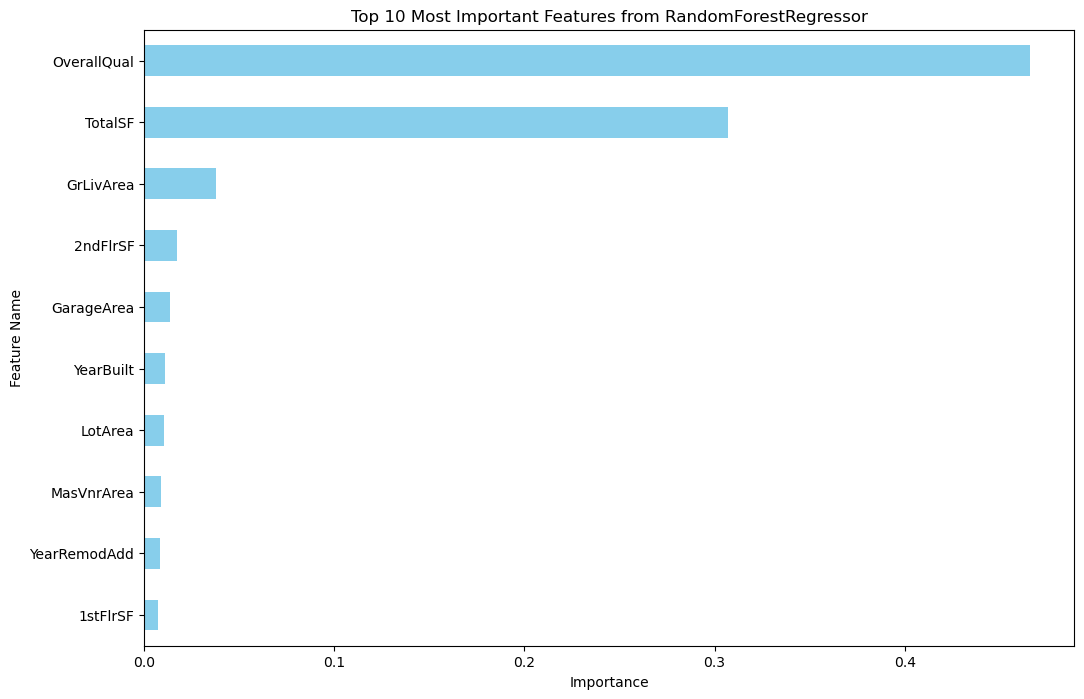

In [72]:
import matplotlib.pyplot as plt

# Extract feature importances
importances = model.feature_importances_

# Map importances to the column names
feature_importances = pd.Series(importances, index=X_train.columns)

# Sort and take top 10
top_10 = feature_importances.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
top_10.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Important Features from RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.gca().invert_yaxis()  # to have the most important feature at the top
plt.show()


# XGBoost Regressor

In [73]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load your housing dataset
# Assuming you have a DataFrame named 'housing' containing your data

# Identify categorical columns
categorical_columns = housing.select_dtypes(include=['object']).columns

# Create dummy variables for categorical columns
housing = pd.get_dummies(housing, columns=categorical_columns, drop_first=True)

# Define your feature matrix and target variable
X = housing.drop(['SalePrice', 'LogSalePrice', 'LogGrLivArea'], axis=1)
y = housing['SalePrice']

# Initialize the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store RMSE and R2 scores for each fold
rmse_scores = []
r2_scores = []

# Perform k-fold cross-validation
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create an XGBoost regressor model
    model = xgb.XGBRegressor(objective="reg:squarederror")
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    
    # Calculate R2 for this fold
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # Display RMSE and R2 for this fold
    print(f"Fold {fold}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")
    fold += 1

# Calculate and print the mean RMSE and R2 across all folds
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Mean R2: {mean_r2:.4f}")


Fold 1: RMSE = 21993.0320, R2 = 0.9214
Fold 2: RMSE = 30534.3195, R2 = 0.8484
Fold 3: RMSE = 23516.4529, R2 = 0.9087
Fold 4: RMSE = 21733.6950, R2 = 0.9078
Fold 5: RMSE = 21729.4646, R2 = 0.8962
Mean RMSE: 23901.3928
Mean R2: 0.8965


In [94]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load your housing dataset
# Assuming you have a DataFrame named 'housing' containing your data

# Identify categorical columns
categorical_columns = housing_coordinates.select_dtypes(include=['object']).columns

# Create dummy variables for categorical columns
housing_coordinates = pd.get_dummies(housing_coordinates, columns=categorical_columns, drop_first=True)

# Define your feature matrix and target variable
X = housing_coordinates.drop(['SalePrice', 'LogSalePrice', 'LogGrLivArea'], axis=1)
y = housing_coordinates['SalePrice']

# Initialize the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store RMSE and R2 scores for each fold
rmse_scores = []
r2_scores = []

# Perform k-fold cross-validation
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create an XGBoost regressor model
    model = xgb.XGBRegressor(objective="reg:squarederror")
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    
    # Calculate R2 for this fold
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # Display RMSE and R2 for this fold
    print(f"Fold {fold}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")
    fold += 1

# Calculate and print the mean RMSE and R2 across all folds
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Mean R2: {mean_r2:.4f}")


Fold 1: RMSE = 24618.2774, R2 = 0.9226
Fold 2: RMSE = 24656.3211, R2 = 0.8913
Fold 3: RMSE = 22131.6248, R2 = 0.8955
Fold 4: RMSE = 20037.6961, R2 = 0.9292
Fold 5: RMSE = 20289.0592, R2 = 0.9139
Mean RMSE: 22346.5957
Mean R2: 0.9105


In [95]:
# Create an XGBoost regressor model (if you haven't already)
model = xgb.XGBRegressor(objective="reg:squarederror")
    
# Fit the model on the entire dataset
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features (adjust N as needed)
top_N = 15  # For example, to display the top 10 features
print(feature_importance_df.head(top_N))


                          Feature  Importance
5                     OverallQual    0.321348
38                        TotalSF    0.144201
157                  ExterQual_TA    0.105330
168                   BsmtQual_Gd    0.025754
15                       2ndFlrSF    0.022689
221             GarageType_Attchd    0.021842
207                KitchenQual_Gd    0.020836
26                     GarageCars    0.018127
202                  CentralAir_Y    0.016363
239                 GarageCond_TA    0.016305
209                KitchenQual_TA    0.011939
1                       GrLivArea    0.011914
24                     Fireplaces    0.009616
1813  Prop_Addr_3313 STOCKBURY ST    0.009074
7                       YearBuilt    0.008792


In [107]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Set negatively correlated neighborhoods to zero
negative_neighborhoods = [
    'Neighborhood_OldTown', 'Neighborhood_NAmes', 'Neighborhood_Edwards',
    'Neighborhood_IDOTRR', 'Neighborhood_BrkSide', 'Neighborhood_MeadowV',
    'Neighborhood_Sawyer', 'Neighborhood_BrDale', 'Neighborhood_SWISU',
    'Neighborhood_NPkVill', 'Neighborhood_Mitchel', 'Neighborhood_Landmrk'
]
for neighborhood in negative_neighborhoods:
    housing_coordinates[neighborhood] = 0

# Assuming the target is 'SalePrice' and other columns are features
X = housing_coordinates.drop(['SalePrice', 'LogSalePrice', 'LogGrLivArea'], axis=1)
y = housing_coordinates['SalePrice']

# Drop non-numeric columns
X = X.select_dtypes(include=['float64', 'int64'])


# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = xgb.XGBRegressor(objective ='reg:squarederror')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print('XBG with negatively correlated neighborhods set to 0')    
print("MSE for each fold:", mse_scores)
print("R^2 for each fold:", r2_scores)


XBG with negatively correlated neighborhods set to 0
MSE for each fold: [119006348.07399593, 240176930.25097805, 148573369.38060457, 207340991.9758226, 128881195.3494363]
R^2 for each fold: [0.9789268670844546, 0.9601354750350116, 0.9724910910695423, 0.968221400680643, 0.9750483206791408]


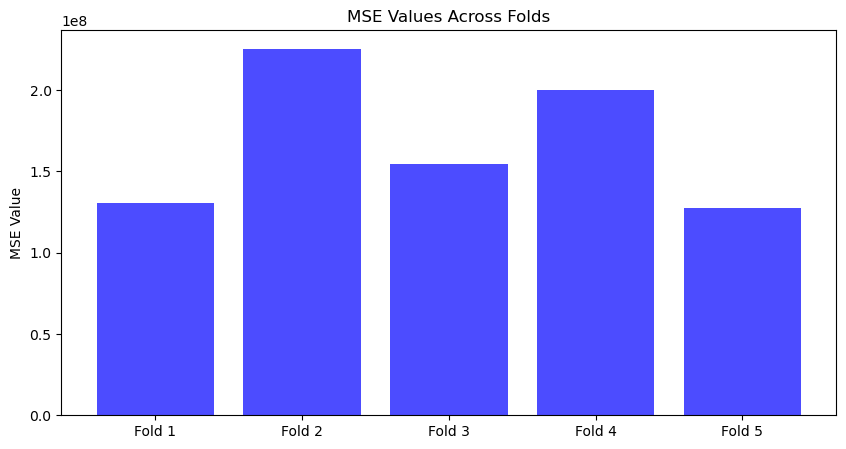

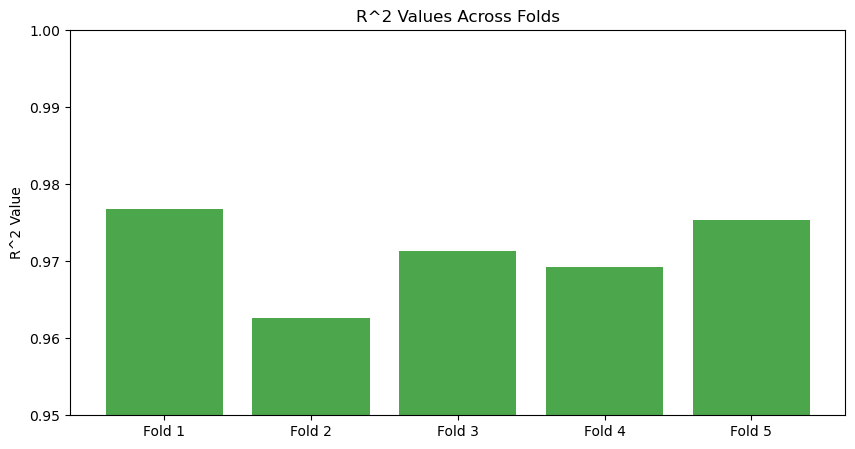

In [108]:
import matplotlib.pyplot as plt

# Given results
mse_values = [130714298.66325526, 225462050.7319067, 154557075.00264412, 200189966.26593482, 127393680.68273637]
r2_values = [0.9768536734865577, 0.9625778481693998, 0.9713831858392202, 0.9693174192662174, 0.9753363067491639]
folds = [f"Fold {i}" for i in range(1, len(mse_values)+1)]

# Bar plot for MSE values
plt.figure(figsize=(10, 5))
plt.bar(folds, mse_values, color='blue', alpha=0.7)
plt.ylabel('MSE Value')
plt.title('MSE Values Across Folds')
plt.show()

# Bar plot for R^2 values
plt.figure(figsize=(10, 5))
plt.bar(folds, r2_values, color='green', alpha=0.7)
plt.ylabel('R^2 Value')
plt.ylim(0.95, 1)  # To zoom into the range of R^2 values for better clarity
plt.title('R^2 Values Across Folds')
plt.show()


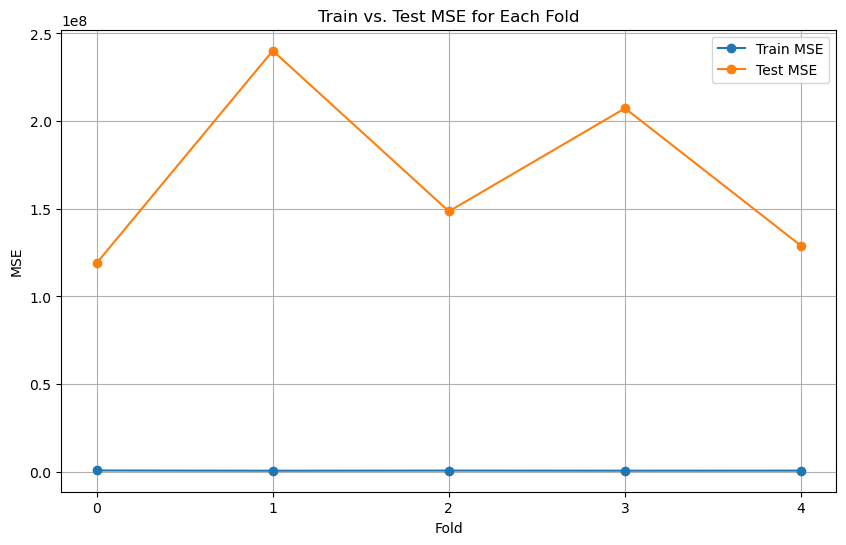

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Lists to store training and test MSE for each fold
train_mse_scores = []
test_mse_scores = []

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = xgb.XGBRegressor(objective ='reg:squarederror')
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    train_mse_scores.append(mean_squared_error(y_train, train_pred))
    test_mse_scores.append(mean_squared_error(y_test, y_pred))

# Plotting
plt.figure(figsize=(10, 6))
x_axis = np.arange(len(train_mse_scores))
plt.plot(x_axis, train_mse_scores, label='Train MSE', marker='o')
plt.plot(x_axis, test_mse_scores, label='Test MSE', marker='o')
plt.legend()
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.title('Train vs. Test MSE for Each Fold')
plt.xticks(x_axis)
plt.grid(True)
plt.show()


In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'lambda': [0, 0.5, 1],
    'alpha': [0, 0.5, 1]
}

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X, y)
print(f"Best hyperparameters: {grid_search.best_params_}")


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best hyperparameters: {'alpha': 0, 'colsample_bytree': 1.0, 'gamma': 0.0, 'lambda': 1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 1.0}


In [111]:
best_params = {
    'alpha': 0,
    'colsample_bytree': 1.0,
    'gamma': 0.0,
    'lambda': 1,
    'max_depth': 3,
    'min_child_weight': 5,
    'subsample': 1.0,
    'objective': 'reg:squarederror'  # This is the default for regression tasks in XGBoost
}

model = xgb.XGBRegressor(**best_params)

kf = KFold(n_splits=5, shuffle=True, random_state=0)

mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
    

print("MSE for each fold:", mse_scores)
print("R^2 for each fold:", r2_scores)
print("Average MSE:", sum(mse_scores) / len(mse_scores))
print("Average R^2:", sum(r2_scores) / len(r2_scores))



MSE for each fold: [98538806.58546123, 158349232.8779519, 75965519.71544346, 125438737.0540172, 90480362.40312581]
R^2 for each fold: [0.9825511714112637, 0.9737172219636021, 0.9859347030196663, 0.9807743402499463, 0.9824828053355901]
Average MSE: 109754531.72719991
Average R^2: 0.9810920483960137


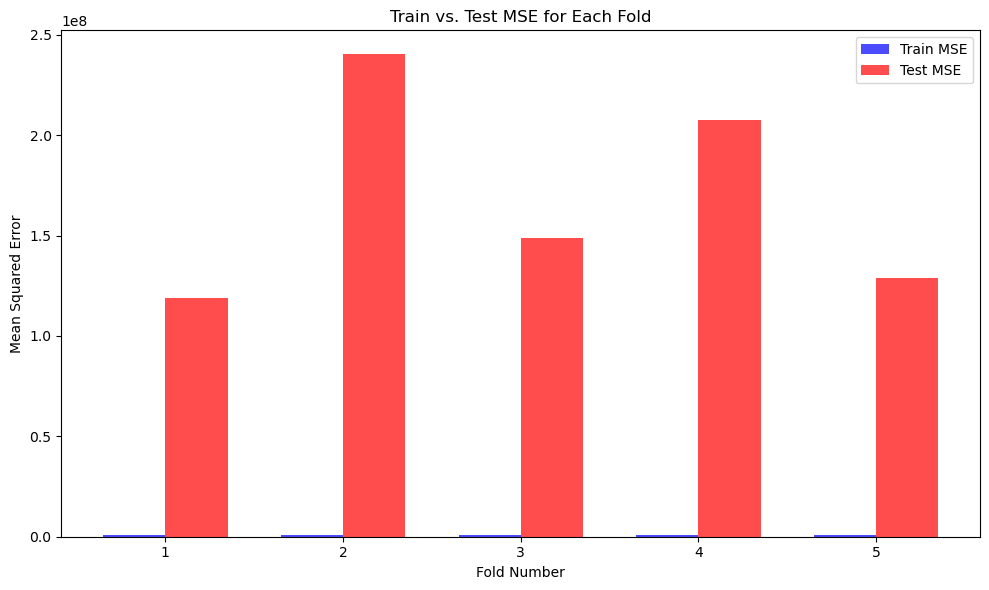

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Number of folds
n_folds = len(train_mse_scores)

# Bar width for plotting
bar_width = 0.35
index = np.arange(n_folds)

# Creating the bar chart
plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, train_mse_scores, bar_width, label='Train MSE', color='b', alpha=0.7)
bar2 = plt.bar(index + bar_width, test_mse_scores, bar_width, label='Test MSE', color='r', alpha=0.7)

# Labeling and titling
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.title('Train vs. Test MSE for Each Fold')
plt.xticks(index + bar_width / 2, range(1, n_folds+1))  # X-axis labels: 1, 2, 3, ...
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()
